I simulate 20 stars between H=20-24 magnitudes (random) with positions defined by a normal distribution with FHWM=1". The central position of the distribution changes and it is moved on the Y-axis by 7, 14 and 21 arcsec. So, we can see the PSF change when going off axis. Single exposure in the H-band with Texp=

This experiment needs AnisoCADO PSF. They can be downloaded from https://simcado.readthedocs.io/en/latest/user_docs/9_PSFs.html  and should be made available to SimCADO by e.g. placing them in the SIM_DATA_DIR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import simcado
from astropy.wcs import WCS
print(simcado.__data_dir__)

/home/mverdugo/simcado_work/simcado/data


In [2]:
# Creating the sources
magnitudes = np.random.uniform(low=20, high=24, size=20) # Vega
x_pos = np.random.normal(scale=1., size=20) 
y_pos = np.random.normal(scale=1., size=20)  


point_src1 = simcado.source.stars(mags=magnitudes, x=x_pos, y=y_pos, 
                                     filter_name='TC_filter_H.dat', spectype="A0V")

point_src2 = simcado.source.stars(mags=magnitudes, x=x_pos, y=y_pos+7, 
                                     filter_name='TC_filter_H.dat', spectype="A0V")

point_src3 = simcado.source.stars(mags=magnitudes, x=x_pos, y=y_pos+14, 
                                     filter_name='TC_filter_H.dat', spectype="A0V")

point_src4 = simcado.source.stars(mags=magnitudes, x=x_pos, y=y_pos+21, 
                                     filter_name='TC_filter_H.dat', spectype="A0V")

src = point_src1 + point_src2 + point_src3 + point_src4

In [3]:
t_exp = 100 # s of exposure time

sim_hdu = simcado.run(src, OBS_DIT=t_exp, detector_layout="full", 
                  FPA_LINEARITY_CURVE=None, filter_name='TC_filter_H.dat',
                  SCOPE_PSF_FILE="AnisoCADO_SCAO_FVPSF_4mas_EsoMedian_20190328.fits")

Detector layout
 id x_cen  y_cen   xhw   yhw  x_len y_len pixsize angle gain
--- ------ ------ ----- ----- ----- ----- ------- ----- ----
  1 -63.84  63.84 30.72 30.72  4096  4096   0.015   0.0  1.0
  2    0.0  63.84 30.72 30.72  4096  4096   0.015   0.0  1.0
  3  63.84  63.84 30.72 30.72  4096  4096   0.015   0.0  1.0
  4  63.84    0.0 30.72 30.72  4096  4096   0.015   0.0  1.0
  5    0.0    0.0 30.72 30.72  4096  4096   0.015   0.0  1.0
  6  -79.5    0.0 30.72 30.72  4096  4096   0.015   0.0  1.0
  7 -63.84 -63.84 30.72 30.72  4096  4096   0.015   0.0  1.0
  8    0.0 -63.84 30.72 30.72  4096  4096   0.015   0.0  1.0
  9  63.84 -63.84 30.72 30.72  4096  4096   0.015   0.0  1.0
Creating 3 layer(s) per chip
9 chip(s) will be simulated
Generating image for chip 1
Generating image for chip 2
Generating image for chip 3
Generating image for chip 4
Generating image for chip 5
Generating image for chip 6
Generating image for chip 7
Generating image for chip 8
Generating image for chip 9
Read

In [4]:
# writing to disk
sim_hdu.writeto("random_stars.fits", overwrite=True)

(0, 9000)

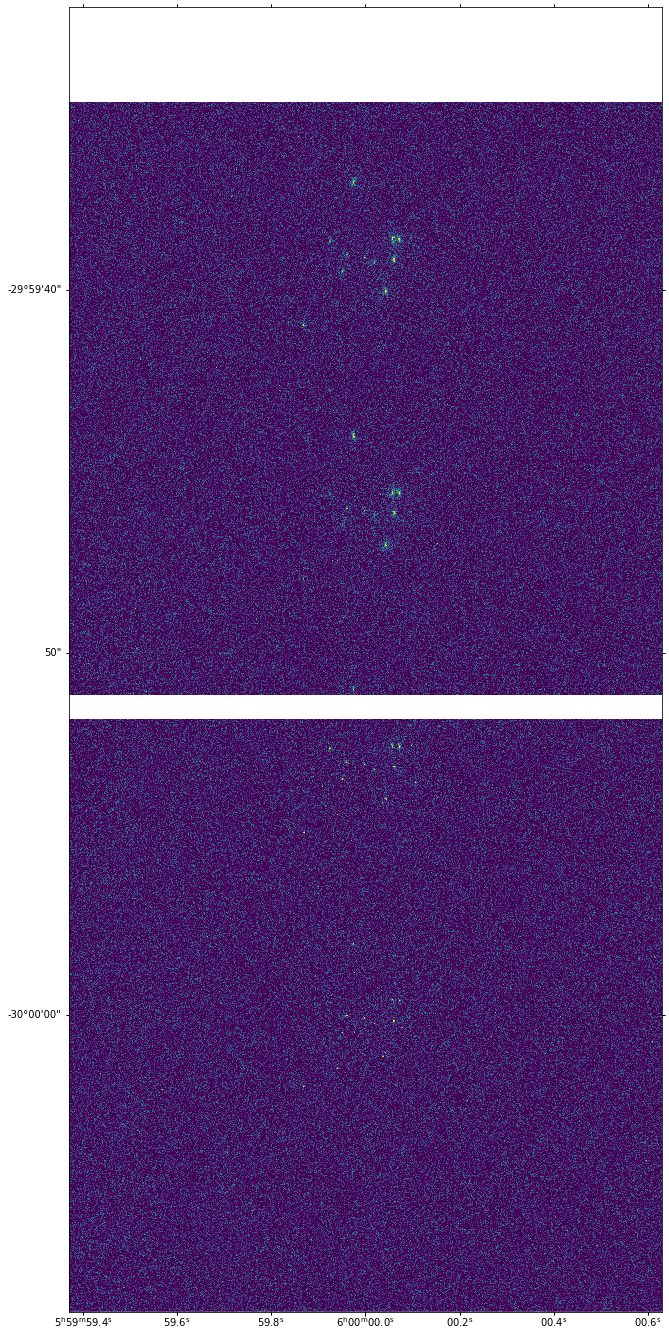

In [5]:
# plotting the results

wcs = WCS(sim_hdu[5])  # center is with respect coordinate (0,0) of chip 5 

fig = plt.figure(figsize=(12,24))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
vmin = np.median(sim_hdu[4].data) 
vmax = vmin + 5*np.std(sim_hdu[4].data)

hdr = sim_hdu[2].header
plt.imshow(sim_hdu[2].data, vmin=vmin, vmax=vmax,   
           transform=ax.get_transform(WCS(hdr)), origin="lower" )

hdr = sim_hdu[5].header
plt.imshow(sim_hdu[5].data, vmin=vmin, vmax=vmax,   
           transform=ax.get_transform(WCS(hdr)), origin="lower" )
       
plt.xlim(0, 4096)
plt.ylim(0, 9000)